In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Loading Data Sets

In [2]:
df_videos = pd.read_csv(r'video_features.csv')
df_views = pd.read_csv(r'video_count.csv')

## Data Preprocessing

In [3]:
df_videos['video_id'] = df_videos['video_id'].astype('str') # convert video_id into a categorical variable
df_videos['video_upload_date'] = pd.to_datetime(df_videos['video_upload_date']) # convert video_upload_date into a date variable
df_videos['video_quality_int'] = pd.to_numeric(df_videos['video_quality'].str[:-1]) # create an order variable from video_quality_int variable by splitting the P and convert into integer

In [4]:
df_videos['upload_month'] = df_videos['video_upload_date'].dt.month_name() # Creating Month variable
df_videos['upload_Wday'] = df_videos['video_upload_date'].dt.day_name() # Creating Week day Variable

In [5]:
df_views['date'] = pd.to_datetime(df_views['date']) # convert video_upload_date into a date variable
df_views['video_id'] = df_views['video_id'].astype('str') # convert video_id into a categorical variable

In [6]:
df_views['month'] = df_views['date'].dt.month_name() # Creating Month variable
df_views['Wday'] = df_views['date'].dt.day_name() # Creating Week day Variable

## Merging

In [7]:
df = df_views.merge(df_videos,'left','video_id') # Merging based on video_id variable

In [110]:
round(df['count'].agg(['mean','median','max','min']),1)

mean       75.4
median     72.0
max       196.0
min         6.0
Name: count, dtype: float64

In [115]:
round(df['video_length'].agg(['mean','median','max','min']),1)

mean      22.7
median    23.0
max       30.0
min       15.0
Name: video_length, dtype: float64

In [31]:
df['video_length'].corr(df['count'])

-0.7378823480043546

In [40]:
df.groupby('video_quality_int')['count'].mean().sort_values

<bound method Series.sort_values of video_quality_int
240     54.817752
360     69.773509
480     70.723003
720     93.234390
1080    93.531234
Name: count, dtype: float64>

In [106]:
df['days_old'] = df['date'] - df['video_upload_date']
df['days_old']=df['days_old']/np.timedelta64(1,'D')

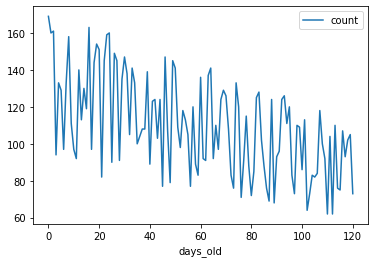

In [116]:
df[df['video_id'] == '1'].sort_values('days_old').plot('days_old','count')

In [117]:
df

,video_id,date,count,month,Wday,video_length,video_language,video_upload_date,video_quality,video_quality_int,upload_month,upload_Wday,days_old
0,56,2017-12-23,33,December,Saturday,27,chineese,2017-10-01,480p,480,October,Sunday,83.0
1,96,2017-12-15,58,December,Friday,20,spanish,2017-09-15,240p,240,September,Friday,91.0
2,100,2017-12-04,114,December,Monday,19,chineese,2017-10-25,360p,360,October,Wednesday,40.0
3,32,2017-12-25,18,December,Monday,29,english,2017-09-07,240p,240,September,Thursday,109.0
4,79,2017-10-17,46,October,Tuesday,30,chineese,2017-09-27,480p,480,September,Wednesday,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,92,2017-12-06,59,December,Wednesday,26,english,2017-10-30,240p,240,October,Monday,37.0
11899,75,2017-10-23,99,October,Monday,22,spanish,2017-09-20,720p,720,September,Wednesday,33.0
11900,90,2017-12-05,88,December,Tuesday,20,chineese,2017-09-22,360p,360,September,Friday,74.0
11901,86,2017-10-14,127,October,Saturday,17,chineese,2017-10-08,240p,240,October,Sunday,6.0
